In [1]:
library(igraph)
library(data.table)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [3]:
PATH = "../gplus/"
circle_files = dir(PATH, pattern = "circles")
counter = 0
for (i in circle_files) {
    user_id = strsplit(i, ".circles")
    circlePATH = paste(PATH, i, sep = "")
    openFile_circle = file(circlePATH, open="r")
    linesInCircle = readLines(openFile_circle)
    close(openFile_circle)    
    if (length(linesInCircle) > 2) {
        counter = counter + 1  #number of personal networks with more than 2 circles
    } 
}
print(counter)

[1] 57


[1] 0.2527654


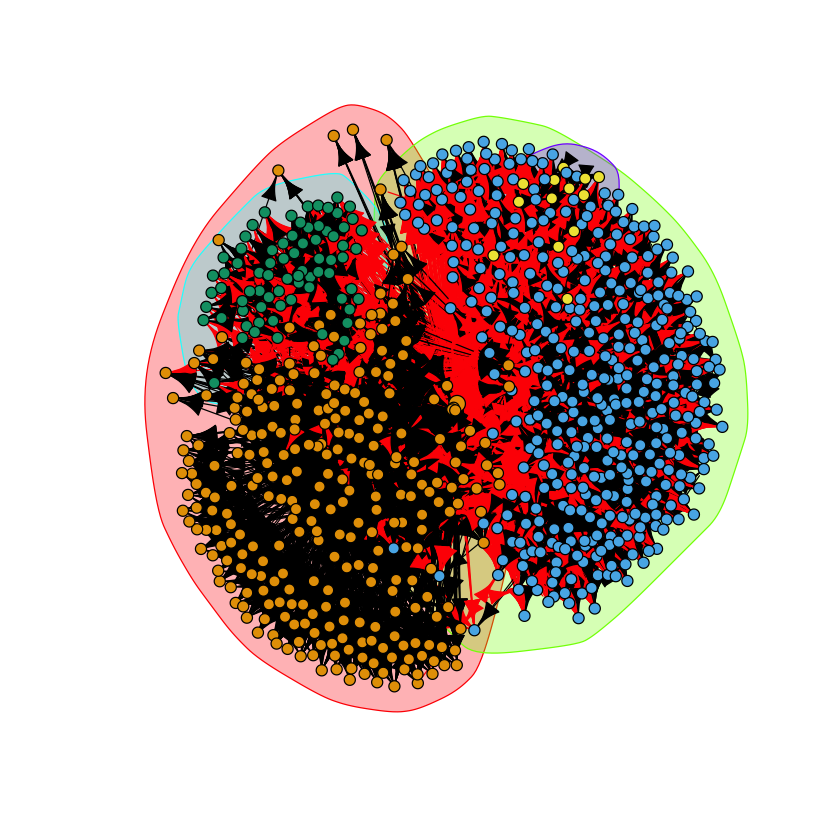

In [4]:
target = c("../gplus/109327480479767108490", "../gplus/115625564993990145546", "../gplus/101373961279443806744")
neighbors = read.table("../gplus/109327480479767108490.feat", colClasses = "character")
edges = read.table("../gplus/109327480479767108490.edges", colClasses = "character")
colnames(neighbors)[1] = "v1"
colnames(neighbors)[2] = "v2"
neighbors <- subset(neighbors, select=c("v1", "v2"))
id = strsplit("../gplus/115625564993990145546", "/")[[1]][[3]]
edge_list = as.vector(t(edges))
temp = neighbors[1]
neighbors[1] = id
neighbors[2] = temp
g <- graph_from_data_frame(neighbors, directed = TRUE, vertices = NULL)
g <- add_edges(g, edge_list)
walktrap <- walktrap.community(g)
color_vector = walktrap$membership+1
vertex_vector = rep(4,vcount(g))
vertex_vector[1]=6
print(modularity(walktrap))
plot(walktrap,g,vertex.color=color_vector,vertex.label=NA,vertex.size=vertex_vector)

In [9]:
sizes(walktrap)

Community sizes
  1   2   3   4 
288 397  76  13 

[1] 0.3128763


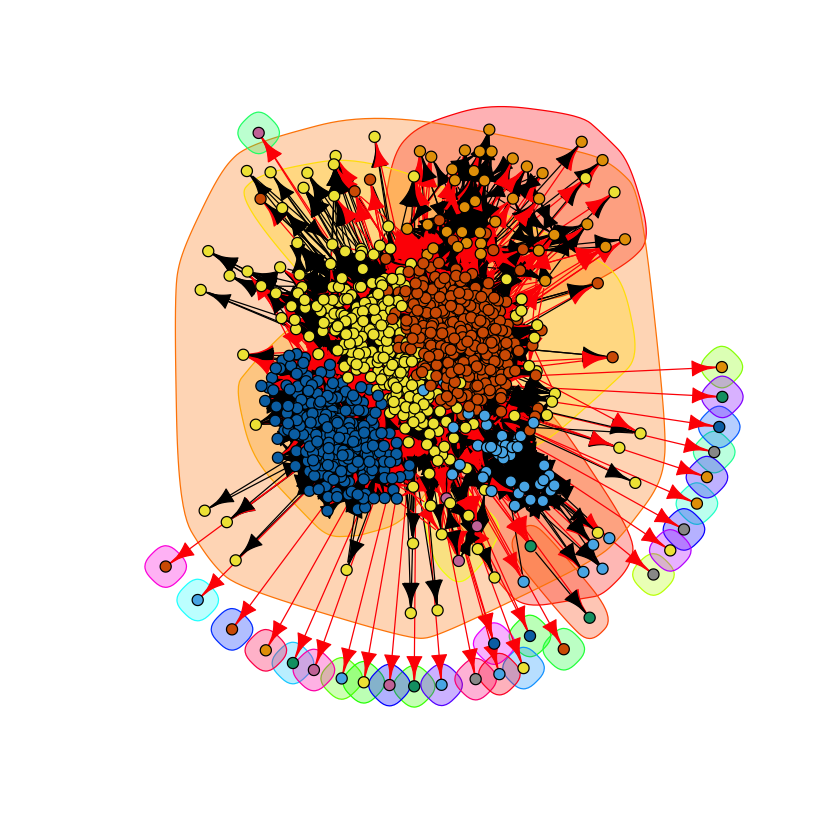

In [3]:
neighbors = read.table("../gplus/115625564993990145546.feat", colClasses = "character")
edges = read.table("../gplus/115625564993990145546.edges", colClasses = "character")
colnames(neighbors)[1] = "v1"
colnames(neighbors)[2] = "v2"
neighbors <- subset(neighbors, select=c("v1", "v2"))
id = strsplit("../gplus/115625564993990145546", "/")[[1]][[3]]
edge_list = as.vector(t(edges))
temp = neighbors[1]
neighbors[1] = id
neighbors[2] = temp
g <- graph_from_data_frame(neighbors, directed = TRUE, vertices = NULL)
g <- add_edges(g, edge_list)
walktrap <- walktrap.community(g)
color_vector = walktrap$membership+1
vertex_vector = rep(4,vcount(g))
vertex_vector[1]=6
print(modularity(walktrap))
plot(walktrap,g,vertex.color=color_vector,vertex.label=NA,vertex.size=vertex_vector)

[1] 0.1638597


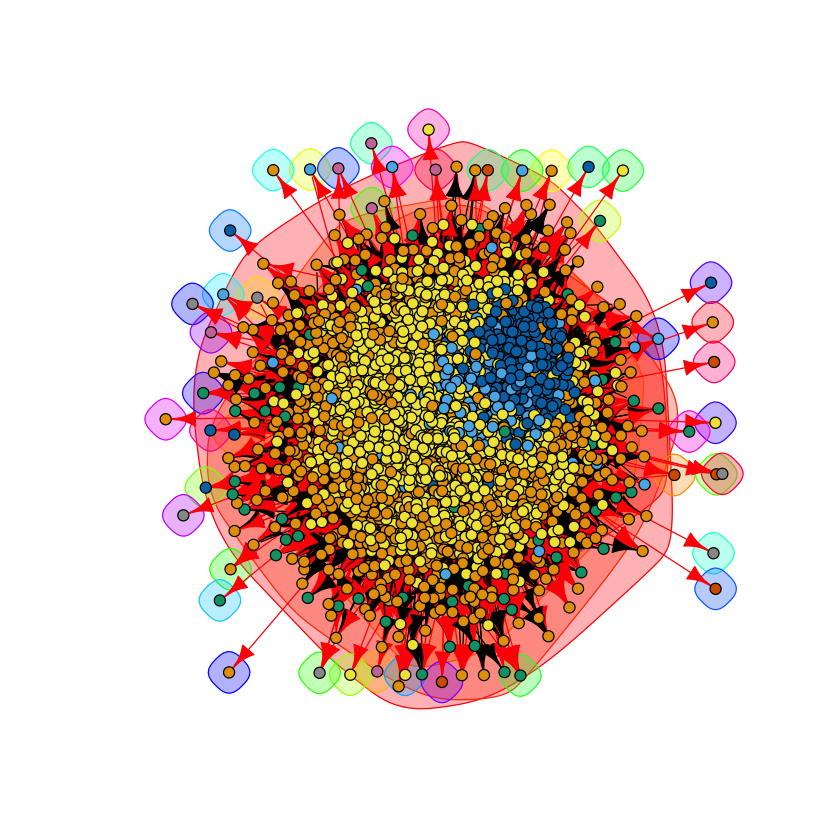

In [6]:
edges = fread("../gplus/101373961279443806744.edges", colClasses = "character")
neighbors = fread("../gplus/101373961279443806744.feat", colClasses = "character", select=c(1,2))
id = strsplit("../gplus/101373961279443806744", "/")[[1]][[3]]
temp = neighbors[, 1]
neighbors[, 1] = id
neighbors[, 2] = temp
colnames(edges )[1] = "v1"
colnames(edges)[2] = "v2"
colnames(neighbors)[1] = "v1"
colnames(neighbors)[2] = "v2"
result <- rbind(neighbors, edges)
g <- graph_from_data_frame(result, directed = TRUE, vertices = NULL)
walktrap <- walktrap.community(g)
color_vector = walktrap$membership+1
vertex_vector = rep(4,vcount(g))
vertex_vector[1]=6
print(modularity(walktrap))
plot(walktrap,g,vertex.color=color_vector,vertex.label=NA,vertex.size=vertex_vector)

In [8]:
vcount(g)

[1] 3832

number of personal networks with more than 2 circles is 57

modularity: 0.2527654, 0.3128763, 0.1638597